# Análise de Vinhos

## Aluno: Lucas Silva Lima

##### Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Desenvolvimento e Questões

- ### 1) Obtenção da Base de Dados

In [2]:
wine_red = np.genfromtxt("./data/winequality-red.csv", delimiter=';', skip_header=1)

In [3]:
wine_white = np.genfromtxt("./data/winequality-white.csv", delimiter=';', skip_header=1)

In [4]:
# adicão da feature type (0: red, 1: white)
wine_red = np.hstack((wine_red, np.full((wine_red.shape[0], 1), 0)))

In [5]:
# adicão da feature type (0: red, 1: white)
wine_white = np.hstack((wine_white, np.full((wine_white.shape[0], 1), 1)))

In [6]:
wines = np.vstack((wine_red, wine_white))

In [7]:
features = wines[:, :-1]

In [8]:
 # type wine
target = wines[:, -1]

In [9]:
columns = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
    "type" # 0: red, 1: white
]

#### Sample

In [10]:
# sample
wines[0, :]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ,  5.    ,  0.    ])

- ### 2) Vizualização da dimensão da matriz dos dados e do vetor de rótulos

In [11]:
print(f"A matriz de dados possui {features.ndim} dimensões e apresenta o formato {features.shape}")

A matriz de dados possui 2 dimensões e apresenta o formato (6497, 12)


In [12]:
print(f"O vetor target possui {target.ndim} dimensões e apresenta o formato {target.shape}")

O vetor target possui 1 dimensões e apresenta o formato (6497,)


- ### 3) Análise inicial dos dados

In [13]:
features.dtype

dtype('float64')

In [14]:
# A base de dados é consistente?
print("A base de dados é consistente? True")

A base de dados é consistente? True


In [15]:
# A base de dados possui valores faltantes?
print(f"A base de dados possui valores faltantes? {np.isnan(features).any()}")

A base de dados possui valores faltantes? False


In [16]:
# A base de dados possui valores não numéricos?
print(f"A base de dados possui valores não numéricos? {not np.vectorize(np.isscalar)(features).all()}")

A base de dados possui valores não numéricos? False


A base de dados é balanceada? (em relação ao type)? False


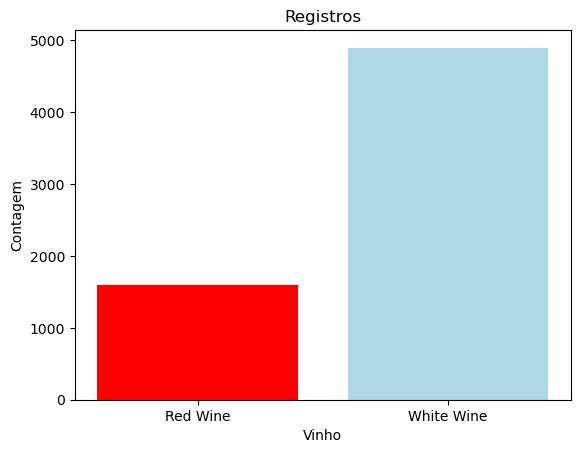

In [17]:
# A base de dados é balanceada? (em relação ao type)

print(f"A base de dados é balanceada? (em relação ao type)? False")

_, contagem = np.unique(target.astype(int), return_counts=True)

plt.bar(['Red Wine', 'White Wine'], contagem, color=["red", "lightblue"])
plt.title('Registros')
plt.xlabel('Vinho')
plt.ylabel('Contagem')

plt.show()


- ### 4) Análise estatística dos dados

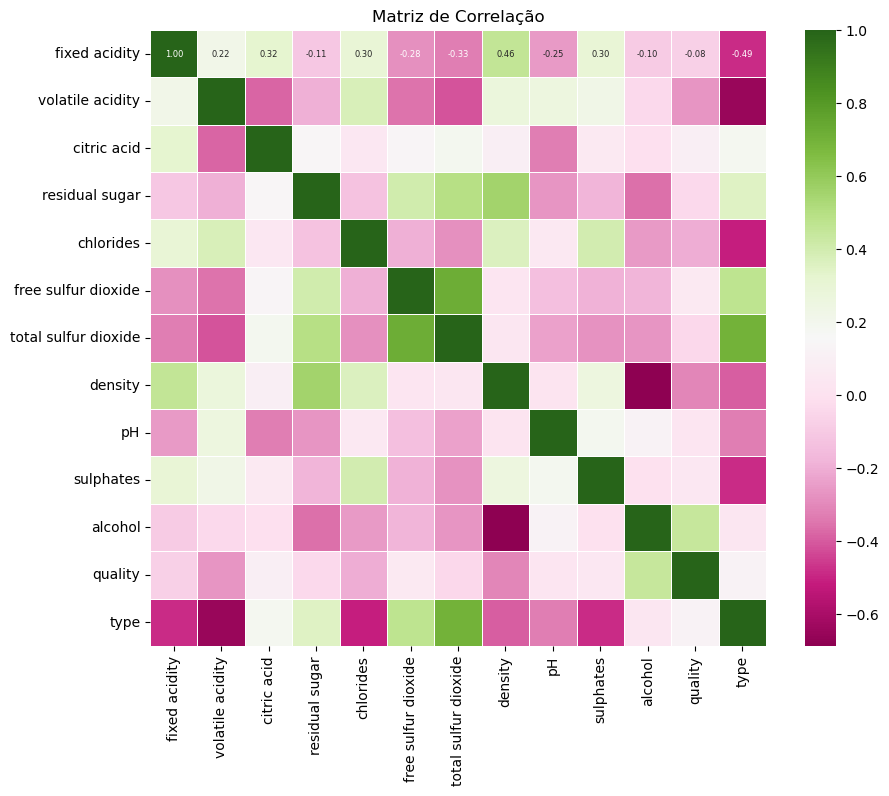

In [18]:
correlation_matrix = np.corrcoef(wines, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='PiYG',
    square=True,
    linewidths=.5,
    annot_kws={"size": 6},
    xticklabels=columns,
    yticklabels=columns
)
plt.title("Matriz de Correlação")
plt.show()

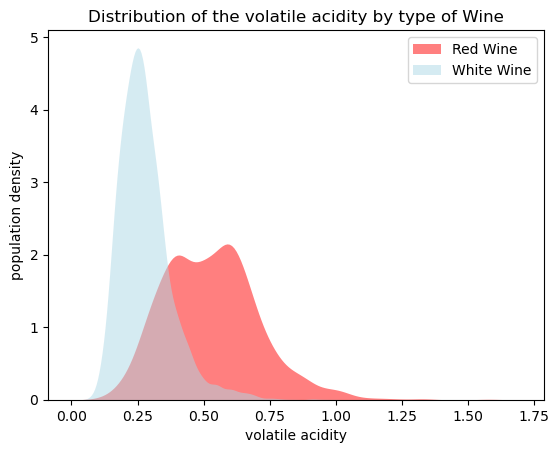

 De acordo com a matriz de correlação, a variável, que de forma isolada, melhor geral distinção entre os tipos de vinho é 'valatile acidity'.
    A distribuição dos valores dessa variével em função do tipo de vinho reforça essa possibilidade.



In [19]:
variable = 1

plt.title(f"Distribution of the {columns[variable]} by type of Wine")

sns.kdeplot(wine_red[:, variable], color="red", label="Red Wine", fill=True, common_norm=False, alpha=.5, linewidth=0)
sns.kdeplot(wine_white[:, variable], color="lightblue", label="White Wine", fill=True, common_norm=False, alpha=.5, linewidth=0)

plt.xlabel(columns[variable])
plt.ylabel('population density')
plt.legend()

plt.show()

print(
    """ De acordo com a matriz de correlação, a variável, que de forma isolada, melhor geral distinção entre os tipos de vinho é 'valatile acidity'.
    A distribuição dos valores dessa variével em função do tipo de vinho reforça essa possibilidade.
""")

- ### 5) Escolha duas das variáveis de entrada e faça um gráfico de dispersão para vizualizar a distribuição dos dados de cada classe de vinho (pelo tipo)

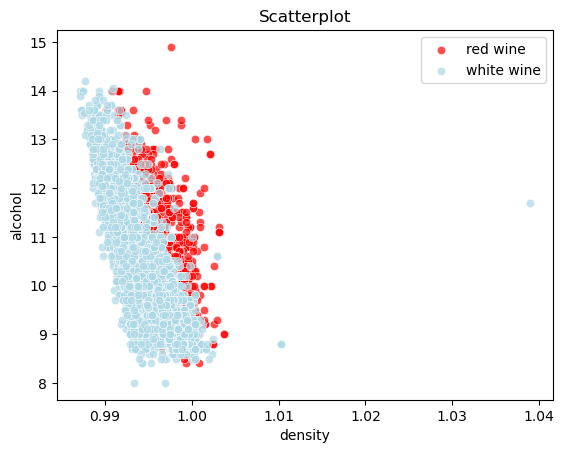

O criterio de escolha foi as variáveis não-alvo que possuiam maior correlação, de modo que o que fosse apresentado pudesse apresentar algum grau de correlação explícita


In [20]:
plt.title('Scatterplot')

sns.scatterplot(x=wine_red[:, 7], y=wine_red[:, 10], color="red", label="red wine", markers="0", alpha=.7)
sns.scatterplot(x=wine_white[:, 7], y=wine_white[:, 10], color="lightblue", label="white wine", markers="s", alpha=.7)

plt.ylabel('alcohol')
plt.xlabel('density')

plt.show()

print("O criterio de escolha foi as variáveis não-alvo que possuiam maior correlação, de modo que o que fosse apresentado pudesse apresentar algum grau de correlação explícita")

- ### 6) Considerando agora a variável de qualidade do vinho, avalie como é a prevalência nas duas classes para os vinhos mais bem avaliados (nota > 7) e para os avaliados com nota < 3

#### Best wines

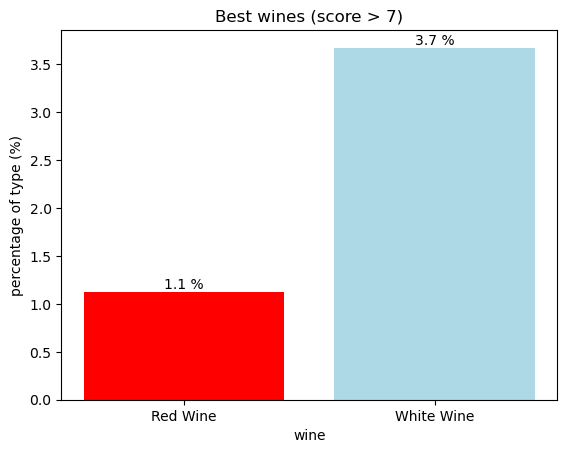

1.1 % dos vinhos tinto possem nota acima de 7, enquanto 3.7 % dos vinhos branco possuem nota acima de 7.


In [21]:
best_wines = wines[wines[:, -2] > 7]

_, contagem = np.unique(best_wines[:, -1], return_counts=True)

contagem = contagem.astype(float)

contagem[0] = contagem[0] * 100.0 / wine_red.shape[0]
contagem[1] = contagem[1] * 100.0 / wine_white.shape[0]

plt.title('Best wines (score > 7)')
bars = plt.bar(['Red Wine', 'White Wine'], contagem, color=["red", "lightblue"])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             f'{height:.1f} %',
             ha='center',
             va='bottom')

plt.xlabel('wine')
plt.ylabel('percentage of type (%)')

plt.show()

print("1.1 % dos vinhos tinto possem nota acima de 7, enquanto 3.7 % dos vinhos branco possuem nota acima de 7.")

#### Worst wines

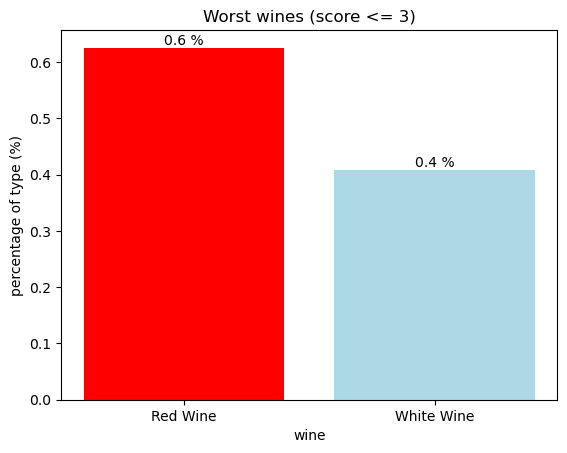

0.6 % dos vinhos tinto possem nota igual ou inferior a 3, enquanto 0.4 % dos vinhos branco possuem nota igual ou inferior a 3.


In [22]:
worst_wines = wines[wines[:, -2] <= 3]

_, contagem = np.unique(worst_wines[:, -1], return_counts=True)

contagem = contagem.astype(float)

contagem[0] = contagem[0] * 100.0 / wine_red.shape[0]
contagem[1] = contagem[1] * 100.0 / wine_white.shape[0]

plt.title('Worst wines (score <= 3)')
bars = plt.bar(['Red Wine', 'White Wine'], contagem, color= ["red", "lightblue"])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             f'{height:.1f} %',
             ha='center',
             va='bottom')
    
plt.xlabel('wine')
plt.ylabel('percentage of type (%)')

plt.show()

print("0.6 % dos vinhos tinto possem nota igual ou inferior a 3, enquanto 0.4 % dos vinhos branco possuem nota igual ou inferior a 3.")